<a href="https://colab.research.google.com/github/gaiobr/aprendizado-de-maquina-edge-ufal/blob/master/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de Qualidade de Vinho Tinto**

Dataset com dados fisíco-químicos e sensorial sobre vinhos tintos da denominação de origem controlada "Vinho Verde".

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



In [2]:
  from google.colab import drive
  drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## **1. Importar bibliotecas**

In [3]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## **2. Carregar conjunto de dados**

In [11]:
# Carregar dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

In [12]:
# Verificar dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **3. Limpar e organizar os dados**

In [13]:
# Verificar e excluir valores NaN, ? ou dados faltantes
df = df.dropna()

## **4. Re-escalar os dados**

### **Re-escalar usando máximo e mínimo**

In [14]:
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].min())/(df.iloc[:,:-1].max()-df.iloc[:,:-1].min())

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


## **5. Organizar os dados para modelagem**

### **Dividir os dados entre atributos descritores e atributos de classe (target)**

In [17]:
# Dividir dados em atributos descritores e atributo de classe
df_x = df.iloc[:,:-1]
df_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [18]:
df_y = df.quality
df_y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### **Dividir os dados entre treino e teste**

In [19]:
# Carregar biblioteca necessária
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2)

In [21]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
533,0.504425,0.102740,0.24,0.082192,0.100167,0.197183,0.095406,0.406021,0.377953,0.197605,0.676923
1049,0.415929,0.260274,0.36,0.061644,0.120200,0.070423,0.038869,0.511747,0.417323,0.263473,0.369231
276,0.203540,0.287671,0.04,0.143836,0.108514,0.084507,0.074205,0.633627,0.748031,0.347305,0.153846
581,0.681416,0.260274,0.49,0.089041,0.128548,0.056338,0.028269,0.743759,0.354331,0.065868,0.184615
596,0.690265,0.191781,0.51,0.075342,0.078464,0.070423,0.063604,0.685022,0.236220,0.161677,0.138462


In [22]:
y_train.head()

533     6
1049    6
276     6
581     5
596     6
Name: quality, dtype: int64

## **6. Definir algoritmo de aprendizado**

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
# Definir modelo
classificador = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=1000)

In [25]:
# Treinar modelo
classificador.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:
# Realizar classificação
classificacao = classificador.predict(x_test)
classificacao

array([6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6,
       6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 7, 6, 5, 6, 5, 5, 6, 5, 6,
       6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 5, 5, 7, 5, 7,
       5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 7, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 7,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 7, 7, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,

## **7. Avaliar classificador**

**Acurácia**: taxa de acertos do classificador

In [29]:
# Calcular acurácia
from sklearn.metrics import accuracy_score

In [30]:
acuracia = accuracy_score(y_test, classificacao)
round(acuracia, 3)

0.606

**Precisão**: taxa de instâncias classificadas como positivas que são realmente positivas

In [33]:
# Calcular precisão
from sklearn.metrics import precision_score

In [36]:
precisao = precision_score(y_test, classificacao, average='micro')
round(precisao, 3)

0.606

**Recall**: taxa de instâncias positivas classificadas corretamente

In [37]:
# Calcular recall (revocação)
from sklearn.metrics import recall_score

In [39]:
recall = recall_score(y_test, classificacao, average='micro')
round(recall, 3)

0.606

**F1-score**: balanço entre precisão e recall

In [40]:
# Calcular F1-score
from sklearn.metrics import f1_score

In [44]:
f1 = f1_score(y_test, classificacao, average='micro')
round(f1, 3)

0.606

### **Curva ROC**

In [45]:
# Plotar curva roc
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, _ = roc_curve(y_test, classificacao, pos_label=8)

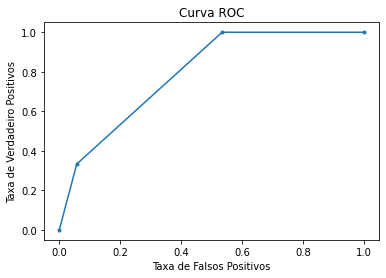

In [47]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

### **Área sob a curva**

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
auc = roc_auc_score(y_test, classificacao)
round(auc, 3)

ValueError: ignored

### **Validação cruzada***

In [50]:
# Avaliar modelo com cross validation
from sklearn.model_selection import cross_val_score

In [51]:
# Definir modelo
classificador = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=1000)

In [53]:
# Calcular os scores
scores = cross_val_score(classificador, df_x, df_y, cv=10)
scores

array([0.475     , 0.6375    , 0.6       , 0.50625   , 0.55      ,
       0.725     , 0.6375    , 0.5625    , 0.65625   , 0.58490566])

In [54]:
round(scores.mean(), 3), round(scores.std(), 3)

(0.593, 0.071)

### **Comparar MLP com Árvore de Decisão e Random Forest**

**Validação Cruzada**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Criar árvore
arvore = DecisionTreeClassifier()

# Calcular os scores
scores_arvore = cross_val_score(arvore, df_x, df_y, cv = 10)

In [57]:
# Criar random forest
floresta = RandomForestClassifier()

# Calcular os scores
scores_floresta = cross_val_score(floresta, df_x, df_y, cv = 10)

In [58]:
# Criar rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=1000)

# Calcular os scores
scores_mlp = cross_val_score(mlp, df_x, df_y, cv = 10) 

In [59]:
print('Árvore de Decisão: ', round(scores_arvore.mean(), 3), round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(), 3), round(scores.std(), 3))
print('MLP: ', round(scores_mlp.mean(), 3), round(scores_mlp.std(), 3))

Árvore de Decisão:  0.469 0.035
Random Forest:  0.593 0.071
MLP:  0.589 0.067


## **8. Otimização de Parâmetros**

#### **Random Search**

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10), (50), (100), (50,10), (100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500, 1000, 2000]
              }
]

In [62]:
mlp = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')

In [63]:
mlp.fit(df_x, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [64]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': 50, 'activation': 'logistic'}


In [65]:
print(round(mlp.best_score_,3))

0.588


#### **Grid Search**

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
mlp = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')

In [68]:
mlp.fit(df_x, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [69]:
print(mlp.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': 10, 'max_iter': 2000, 'solver': 'adam'}


In [70]:
print(round(mlp.best_score_, 3))

0.6


In [76]:
mlp.cv_results_

{'mean_fit_time': array([ 0.30237904,  1.06885638,  1.23476439,  0.31337109,  1.69522429,
         1.39792738,  0.28579612,  1.68896685,  1.26060619,  0.58138895,
         1.37301946,  1.17569261,  0.57665625,  1.86319327,  1.0851685 ,
         0.59146156,  2.06482949,  1.09288735,  0.82374296,  1.75102997,
         1.11914692,  0.86987143,  2.41945844,  1.02311659,  0.88306742,
         2.29868779,  1.02934184,  0.80534978,  1.6892374 ,  0.96113634,
         0.86236424,  2.28077741,  0.8486043 ,  0.84553919,  2.32996483,
         0.91975522,  1.72697206,  4.20297494,  1.44502511,  1.7081862 ,
         5.99131498,  1.29999933,  1.73919868,  5.85500956,  1.16332078,
         0.68717456,  0.46809053,  1.41530352,  1.36266832,  0.45688972,
         2.16917434,  2.67209516,  0.47340984,  2.13404484,  2.55986543,
         0.45298357,  2.3379817 ,  5.11412625,  0.44479427,  3.03877792,
        10.10227036,  0.44943681,  2.93031139,  4.48395038,  0.59095192,
         3.15586405,  8.85387902, 

## **9. Análise dos Resultados**

Na curva ROC as linhas se afastam do topo e da esquerda do gráfico, indicando um alto número de falsos positivos. 

A capacidade de predição do modelo com Redes Neurais Artificiais foi baixa, com média de 59,3% de acerto.

Ao comparar as técnicas, a capacidade de predição dos modelos é baixa em todas as utilizadas. Sendo que a técnica de Random Forest apresentou uma capacidade preditiva melhor, com 59,3% de acerto, enquanto a Árvore de Decisão apresentou 46,9% e a Rede Neural 58,9%.

É provável que os dados apresentados não sejam suficientemente bons para prever a qualidade do vinho.

